In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
pd.set_option('max_columns', None)


In [2]:
import pandas as pd

read_file = pd.read_csv (r'drug_consumption.data')
read_file.to_csv (r'drug_dataset.csv', index=None)

In [3]:
data=pd.read_csv('drug_dataset.csv')
data.head()


,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2.1,CL6,CL0.1,CL5.1,CL0.2,CL0.3,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [4]:
data.columns=['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive',
             'SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine ',
              'Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA '
             ]

In [5]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [6]:
data.shape

(1884, 32)

In [7]:
data.tail

<bound method NDFrame.tail of         ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
1        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
2        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
3        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
4        6  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1879  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1880  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1881  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1882  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1883  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700  

In [8]:
data.info

<bound method DataFrame.info of         ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
1        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
2        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
3        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
4        6  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1879  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1880  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1881  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1882  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1883  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700

In [9]:
data.describe

<bound method NDFrame.describe of         ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
1        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
2        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
3        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
4        6  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1879  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1880  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1881  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1882  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1883  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.127

In [10]:
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine ', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA '],
      dtype='object')

In [11]:
data.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [12]:
data.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [13]:
data['Alcohol'].nunique()

7

In [14]:
data['Alcohol'].unique()

array(['CL5', 'CL6', 'CL4', 'CL2', 'CL1', 'CL0', 'CL3'], dtype=object)

In [15]:
data['Amphet'].nunique()

7

In [16]:
data['Amphet'].unique()

array(['CL2', 'CL0', 'CL1', 'CL3', 'CL5', 'CL4', 'CL6'], dtype=object)

In [17]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Choc',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'Semer',
         'VSA'    ]

In [18]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7

In [19]:
data=data.rename(columns={'Ketamine ': 'Ketamine'})

In [20]:
data=data.rename(columns={'VSA ':'VSA'})

In [21]:
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [22]:
for column in drugs:
    data[column] = data[column].apply(drug_encoder)

In [23]:
data.describe

<bound method NDFrame.describe of         ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
1        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
2        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
3        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
4        6  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1879  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1880  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1881  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1882  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1883  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.127

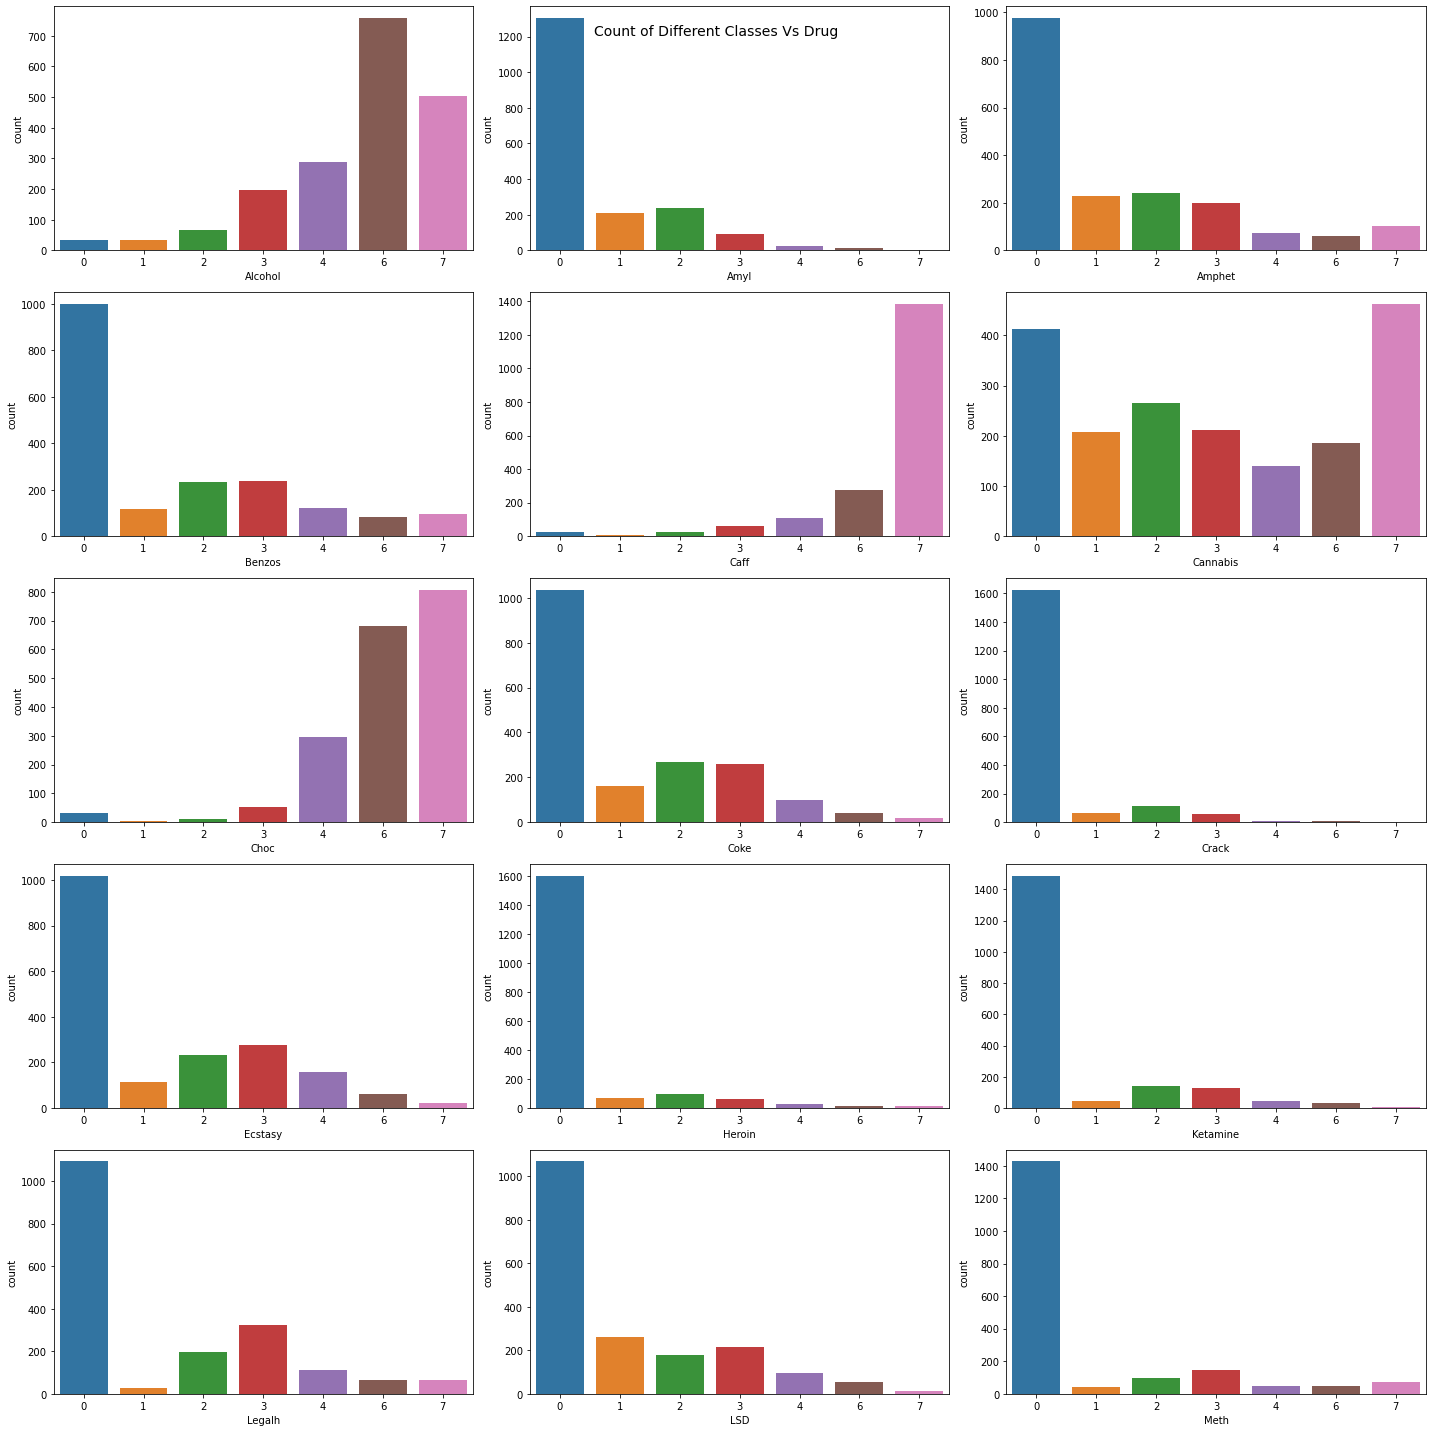

In [24]:
fig, axes = plt.subplots(5,3,figsize = (20,20))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=drugs[k], data=data,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

In [299]:
data.drop('ID',axis=1,inplace=True)

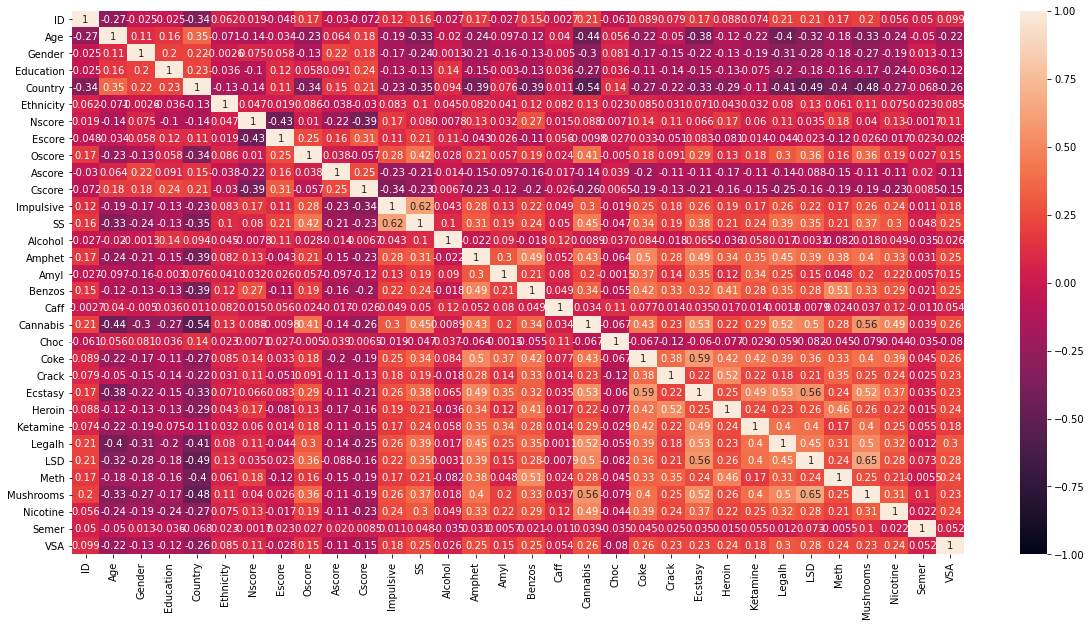

In [25]:
#heat map
#search for the correlation between the features
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [26]:
data2=data.copy()

In [27]:
#drop columns with low depedencies : nscore,escore,oscore,aScore,cscore,impulsive
data2=data2.drop(['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS'],axis=1)

In [28]:
data2.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

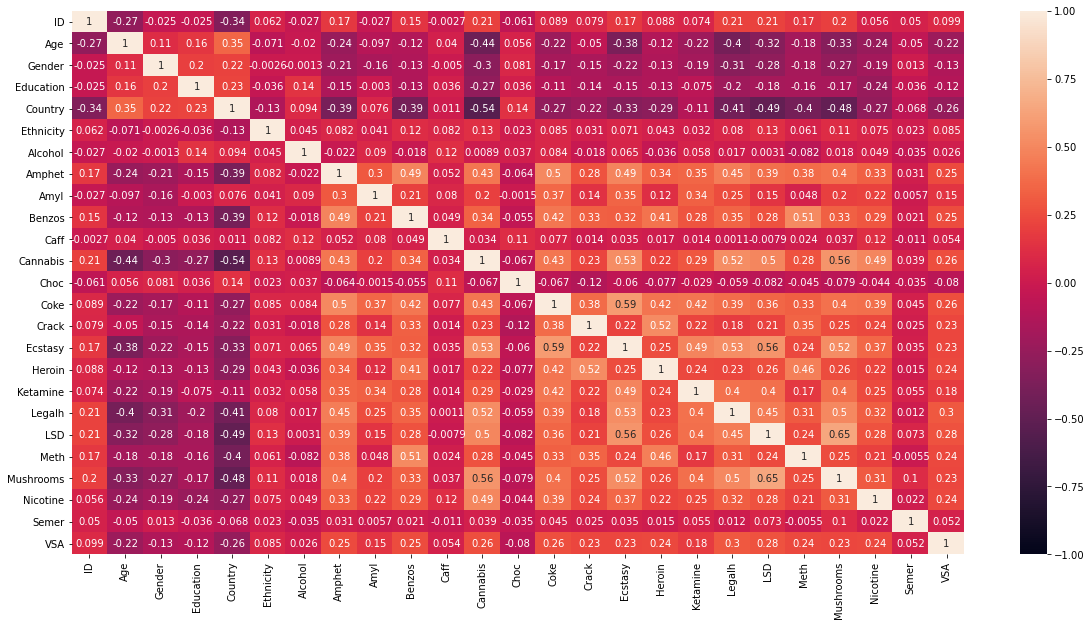

In [29]:
corr = data2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [ ]:
#categorical features
#high negative correlation between Age and most of the drugs ( cannabis, ecstasy, legalh ...)
#high negative correlation also between the Gender and the drugs

In [32]:
from sklearn import preprocessing

In [33]:
data2['Age']=data2['Age'].astype('float')
data2['Country']=data2['Country'].astype('float')

In [34]:
#convert columns : age, gender, education, country, ethnicity into str
le = preprocessing.LabelEncoder()
data2['Gender'] = le.fit_transform(data2['Gender'].astype(str))
data2['Eduction'] = le.fit_transform(data2['Education'].astype(str))
#data['Country'] = le.fit_transform(data['Country'].astype(str))
data2['Ethnicity'] = le.fit_transform(data2['Ethnicity'].astype(str))

In [35]:
#update data
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in data2['Age']]

In [36]:
gender = ['Female' if g > 0 else "Male" for g in data2['Gender']]

In [37]:
education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in data2['Education']]

In [38]:
country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in data2['Country']]

In [39]:
ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in data2['Ethnicity']]

In [40]:
data2['Age'] = age
data2['Gender'] = gender
data2['Education'] = education
data2['Country'] = country
data2['Ethnicity'] = ethnicity

In [41]:
data2.head()

,ID,Age,Gender,Education,Country,Ethnicity,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Eduction
0,2,25-34,Male,Doctorate degree,UK,Other,6,2,2,0,7,4,7,3,0,4,0,2,0,2,3,0,4,0,0,8
1,3,35-44,Male,Professional certificate/ diploma,UK,Other,7,0,0,0,7,3,4,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4,18-24,Female,Masters degree,UK,Other,4,0,0,3,6,2,4,2,0,0,0,2,0,0,0,0,2,0,0,7
3,5,35-44,Female,Doctorate degree,UK,Other,4,1,1,0,7,3,7,0,0,1,0,0,1,0,0,2,2,0,0,8
4,6,65+,Female,Left school at 18 years,Canada,Other,2,0,0,0,7,0,4,0,0,0,0,0,0,0,0,0,7,0,0,2


In [ ]:
#vizalization of the categorical variables

In [42]:
def value_counts_percentage(dataset, column):
    a = dataset[column].value_counts()
    b = dataset[column].value_counts(normalize=True) * 100    
    return pd.concat([a,b.round(2)], axis=1, keys=['N', '%'])

In [43]:
value_counts_percentage(data2, 'Gender')
#The percentage of female is nearly the same as the percentage of male

,N,%
Male,943,50.05
Female,941,49.95


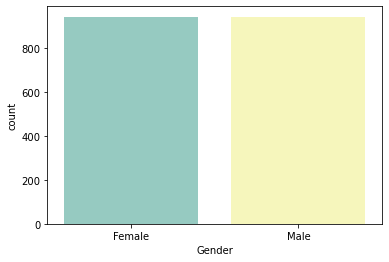

In [44]:
#vizualization of the number of drog users in function of gender
sns.countplot(x='Gender', palette='Set3', data=data2.sort_values(by=['Gender']))

In [45]:
value_counts_percentage(data2, 'Age')
#the highest percentage of drug users are aged between 18 and 24 
#the lowest percentage of drug users are aged from 65 and above

,N,%
18-24,643,34.13
25-34,481,25.53
35-44,355,18.84
45-54,294,15.61
55-64,93,4.94
65+,18,0.96


In [ ]:
#data['Alchool']=data['Age'].astype('float')

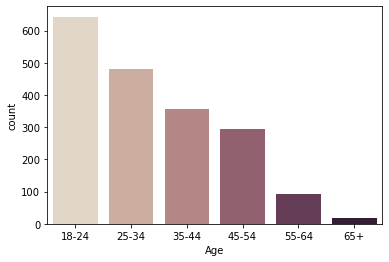

In [46]:
#vizualization of the number of drog users in function of age
sns.countplot(x='Age', palette='ch:.25', data=data2.sort_values(by=['Age']))

In [47]:
#same thing for the education 
value_counts_percentage(data2, 'Education')
#the highest percentage represents the person with Some college or university, no certificate or degree	 (26.86%) and person with an university degree (25.48%)

,N,%
"Some college or university, no certificate or degree",506,26.86
University degree,480,25.48
Masters degree,283,15.02
Professional certificate/ diploma,269,14.28
Left school at 18 years,100,5.31
Left school at 16 years,99,5.25
Doctorate degree,89,4.72
Left school at 17 years,30,1.59
Left school before 16 years,28,1.49


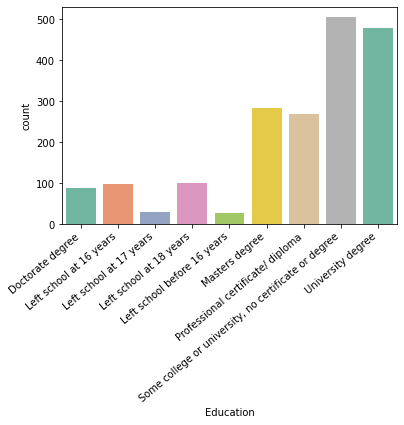

In [48]:
education = sns.countplot(x='Education', palette='Set2', data=data2.sort_values(by=['Education']))
education.set_xticklabels(education.get_xticklabels(), rotation=40, ha="right")
education

In [49]:
value_counts_percentage(data2, 'Ethnicity')

,N,%
Other,1720,91.30
Mixed-Black/Asian,144,7.64
Mixed-White/Black,20,1.06


In [50]:
value_counts_percentage(data2, 'Country')

,N,%
UK,1043,55.36
USA,557,29.56
Other,118,6.26
Canada,87,4.62
Australia,54,2.87
Ireland,20,1.06
New Zealand,5,0.27


In [323]:
#pie chart


In [315]:
pd.crosstab(data2['Country'], [data2['Gender'], data2['Ethnicity']])
#cross table using the country gender and ethnicity
#for example in USA and UK we have a number of male with other ethnicity really high compared to the the mixed-black/asian

Gender                 Female                                      Male  \
Ethnicity   Mixed-Black/Asian Mixed-White/Black Other Mixed-Black/Asian   
Country                                                                   
Australia                   0                 0    21                 1   
Canada                      3                 0    38                 2   
Ireland                     0                 0     9                 0   
New Zealand                 0                 0     1                 0   
Other                       4                 2    30                 7   
UK                         42                 9   571                26   
USA                        24                 0   187                35   

Gender                               
Ethnicity   Mixed-White/Black Other  
Country                              
Australia                   0    32  
Canada                      2    42  
Ireland                     0    11  
New Zealand                 0     4  
Other                       1    74  
UK                          1   394  
USA                         5   306

In [51]:
data2.pivot_table(index='Education', columns=['Gender', 'Ethnicity'], aggfunc='size', fill_value=0)


Gender                                                        Female  \
Ethnicity                                          Mixed-Black/Asian   
Education                                                              
Doctorate degree                                                   3   
Left school at 16 years                                            2   
Left school at 17 years                                            0   
Left school at 18 years                                            2   
Left school before 16 years                                        0   
Masters degree                                                    18   
Professional certificate/ diploma                                  5   
Some college or university, no certificate or d...                17   
University degree                                                 26   

Gender                                                                      \
Ethnicity                                          Mixed-White/Black Other   
Education                                                                    
Doctorate degree                                                   2    52   
Left school at 16 years                                            0    41   
Left school at 17 years                                            1    13   
Left school at 18 years                                            0    35   
Left school before 16 years                                        0    12   
Masters degree                                                     5   156   
Professional certificate/ diploma                                  0   130   
Some college or university, no certificate or d...                 1   153   
University degree                                                  2   265   

Gender                                                          Male  \
Ethnicity                                          Mixed-Black/Asian   
Education                                                              
Doctorate degree                                                   3   
Left school at 16 years                                            1   
Left school at 17 years                                            2   
Left school at 18 years                                            4   
Left school before 16 years                                        0   
Masters degree                                                    10   
Professional certificate/ diploma                                 13   
Some college or university, no certificate or d...                22   
University degree                                                 16   

Gender                                                                      
Ethnicity                                          Mixed-White/Black Other  
Education                                                                   
Doctorate degree                                                   0    29  
Left school at 16 years                                            1    54  
Left school at 17 years                                            0    14  
Left school at 18 years                                            3    56  
Left school before 16 years                                        0    16  
Masters degree                                                     1    93  
Professional certificate/ diploma                                  1   120  
Some college or university, no certificate or d...                 3   310  
University degree                                                  0   171

In [ ]:
#ALCOHOL

Text(0.5, 1.03, 'Ethnicity vs Alcohol')

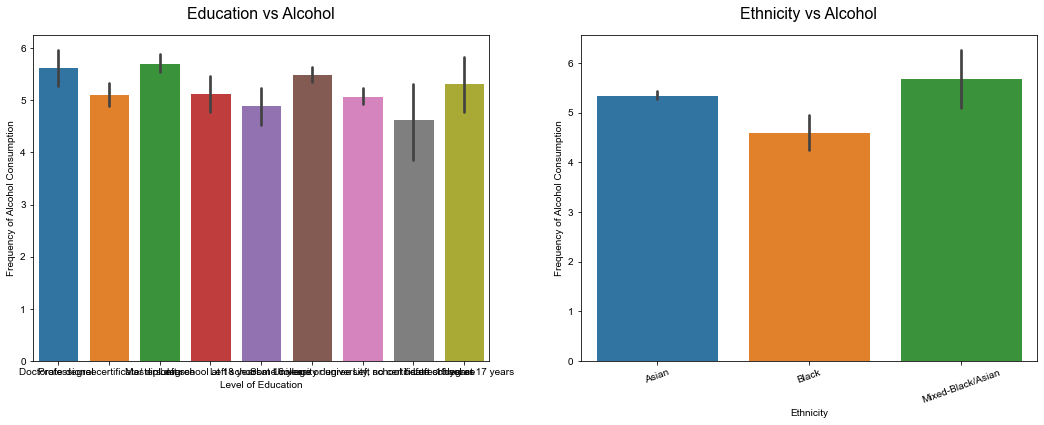

In [52]:
#vizualisation the  distribution of alcohol and ethnicity and education for example
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ethnicities = ['Asian','Black','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black','Other','White']
sns.set_style('whitegrid')
sns.barplot(data=data2, x='Education', y='Alcohol', ax=ax1)
sns.barplot(data=data2, x='Ethnicity', y='Alcohol', ax=ax2)
ax1.set(xlabel='Level of Education', ylabel='Frequency of Alcohol Consumption')
ax2.set(xlabel='Ethnicity', ylabel='Frequency of Alcohol Consumption')
ax2.set_xticklabels(labels=ethnicities, rotation=20)
ax1.set_title('Education vs Alcohol', y=1.03, fontsize=16)   
ax2.set_title('Ethnicity vs Alcohol', y=1.03, fontsize=16) 

In [ ]:
#Cannabis


Text(0.5, 1.03, 'Age vs Cannabis')

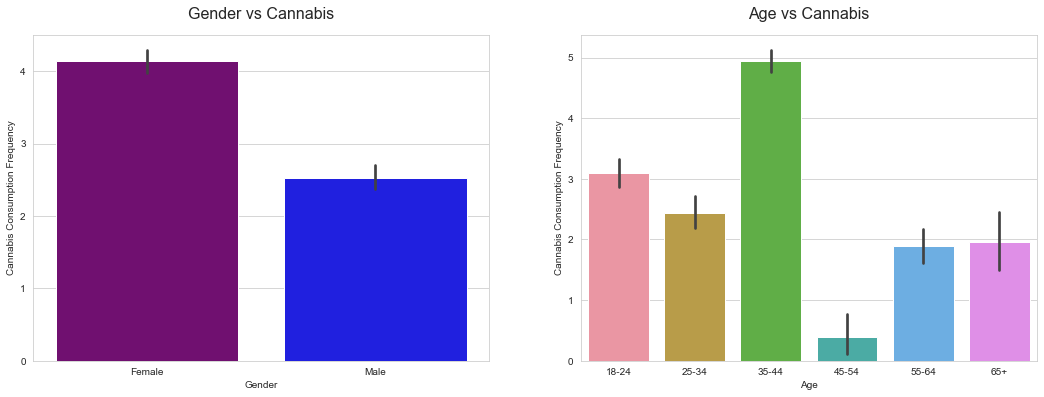

In [53]:
f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
genders = ['Female', 'Male']
ages = ['18-24','25-34','35-44','45-54','55-64','65+']
sns.set_style('darkgrid')
custom_palette=['purple','blue']   
sns.set_palette(custom_palette)
sns.barplot(x='Gender', y='Cannabis', data=data2, ax=ax1)    
sns.barplot(x='Age',y='Cannabis', data=data2, ax=ax2)
ax1.set(xlabel = 'Gender', ylabel = 'Cannabis Consumption Frequency')   
ax1.set_xticklabels(genders)
ax2.set(xlabel = 'Age', ylabel = 'Cannabis Consumption Frequency')   
ax2.set_xticklabels(ages)
ax1.set_title('Gender vs Cannabis', y=1.03, fontsize=16)   
ax2.set_title('Age vs Cannabis', y=1.03, fontsize=16) 

In [ ]:
#Ecstasy

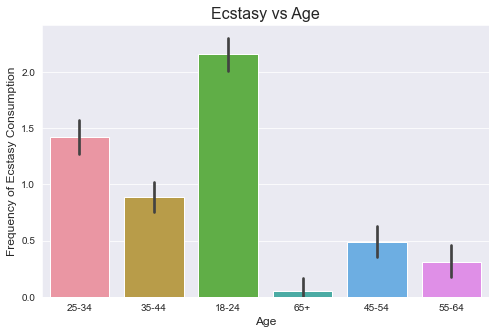

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(data=data2, x='Age', y='Ecstasy')
plt.title('Ecstasy vs Age', size=16)
plt.xlabel('Age', size=12)
plt.ylabel('Frequency of Ecstasy Consumption', size=12)
plt.show()

In [351]:
#nicotine 

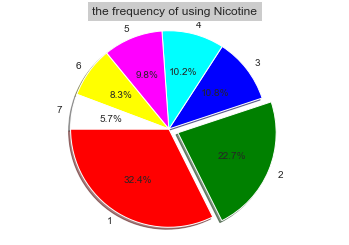

In [375]:
#vizualisation of the frequency of using 
#0: never used, 1: Used over a Decade Ago, 2: Used in Last Decade, 3:Used in Last Year,4:Used in Last Month,5: Used in Last Week,6 Used in Last day
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0,0,0,0)  
mylabels=['1','2','3','4','5','6','7']
mycolors = ["Red", "Green", "Blue", "Cyan","Magenta","Yellow","White"]

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=mycolors,
        shadow=True, startangle=900)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('the frequency of using Nicotine',bbox={'facecolor':'0.8', 'pad':5})
plt.show()


In [391]:
#Legalh

Text(0.5, 1.03, 'Age vs Legal Highs')

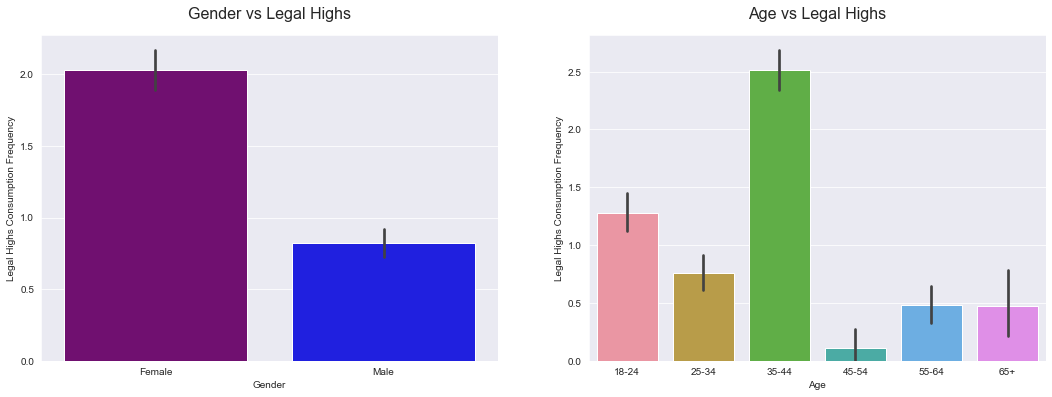

In [55]:
f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
genders = ['Female', 'Male']
ages = ['18-24','25-34','35-44','45-54','55-64','65+']
sns.set_style('darkgrid')
custom_palette=['purple','blue']   
sns.set_palette(custom_palette)
sns.barplot(x='Gender', y='Legalh', data=data2, ax=ax1)    
sns.barplot(x='Age',y='Legalh', data=data2, ax=ax2)
ax1.set(xlabel = 'Gender', ylabel = 'Legal Highs Consumption Frequency')   
ax1.set_xticklabels(genders)
ax2.set(xlabel = 'Age', ylabel = 'Legal Highs Consumption Frequency')   
ax2.set_xticklabels(ages)
ax1.set_title('Gender vs Legal Highs', y=1.03, fontsize=16)   
ax2.set_title('Age vs Legal Highs', y=1.03, fontsize=16) 

### age & alcohol using heat map (because age and alcohol are both seperated into classes)

In [5]:
df = pd.read_csv('drug_consumption.data',header=None)
df.rename(columns={0:'id',1:'age',2:'gender',3:'education',4:'country',5:'ethnicity',
                   6:'nscore',7:'escore',8:'oscore',9:'ascore',10:'cscore',
                   11:'implusive',12:'ss',13:'alcohol',14:'amphet',15:'amyl',
                   16:'benzos',17:'caff',18:'cannabis',19:'choc',20:'coke',
                   21:'crack',22:'ecstasy',23:'heroin',24:'ketamine',25:'legalh',
                   26:'LSD',27:'meth',28:'mushrooms',29:'nicotine',30:'semer',31:'VSA'}, inplace=True)
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,implusive,ss,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,LSD,meth,mushrooms,nicotine,semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
df_age=df[['alcohol','age']]
piv_age=df_age.pivot_table(index=['alcohol'],columns=['age'],aggfunc=len)
piv_age.rename(index={'CL0':'Never Used','CL1':'Used over a Decade Ago','CL2':'Used in Last Decade',
                  'CL3':'Used in Last Year','CL4':'Used in Last Month','CL5':'Used in Last Week','CL6':'Used in Last Day'},
           columns={-0.95197:'18-24',-0.07854:'25-34',0.49788:'35-44',1.09449:'45-54',1.82213:'55-64',2.59171:'65+'}, inplace=True)
piv_age

age,18-24,25-34,35-44,45-54,55-64,65+
alcohol,,,,,,
Never Used,14.0,9.0,5.0,3.0,1.0,2.0
Used over a Decade Ago,NaN,3.0,10.0,13.0,7.0,1.0
Used in Last Decade,13.0,15.0,19.0,15.0,5.0,1.0
Used in Last Year,75.0,52.0,32.0,27.0,9.0,3.0
Used in Last Month,121.0,70.0,49.0,38.0,7.0,2.0
Used in Last Week,271.0,209.0,129.0,114.0,32.0,4.0
Used in Last Day,149.0,123.0,112.0,84.0,32.0,5.0


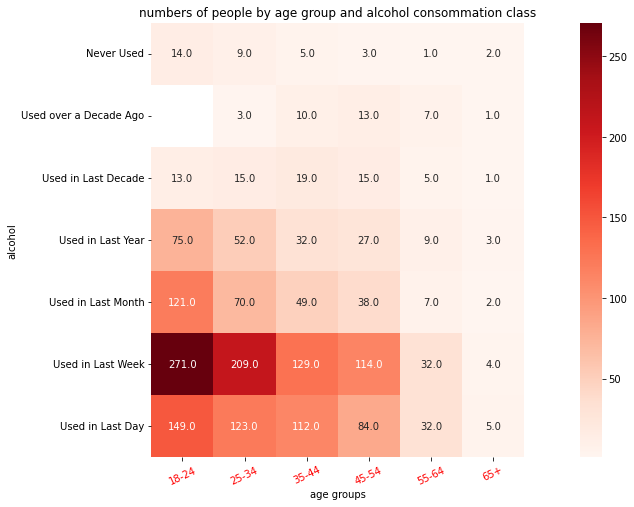

In [7]:
plt.figure(figsize=(20,8))
heat_map=sns.heatmap(piv_age,annot=True,fmt="",cmap="Reds", square=True)
heat_map.set_xticklabels(heat_map.get_xticklabels(),rotation=25,color='red')
heat_map.set_title('numbers of people by age group and alcohol consommation class')
heat_map.set_xlabel('age groups')
heat_map.set_ylabel('alcohol')
plt.show()

### gender & alcohol using bar plot

In [14]:
df_gender=df[['alcohol','gender']]
piv_gender=df_gender.pivot_table(index=['alcohol'],columns=['gender'],aggfunc=len)
piv_gender.rename(index={'CL0':'Never Used','CL1':'Used over a Decade Ago','CL2':'Used in Last Decade',
                  'CL3':'Used in Last Year','CL4':'Used in Last Month','CL5':'Used in Last Week','CL6':'Used in Last Day'},
           columns={-0.48246:'male',0.48246:'female'}, inplace=True)
piv_gender

gender,male,female
alcohol,,
Never Used,19,15
Used over a Decade Ago,17,17
Used in Last Decade,36,32
Used in Last Year,105,93
Used in Last Month,135,152
Used in Last Week,356,403
Used in Last Day,275,230


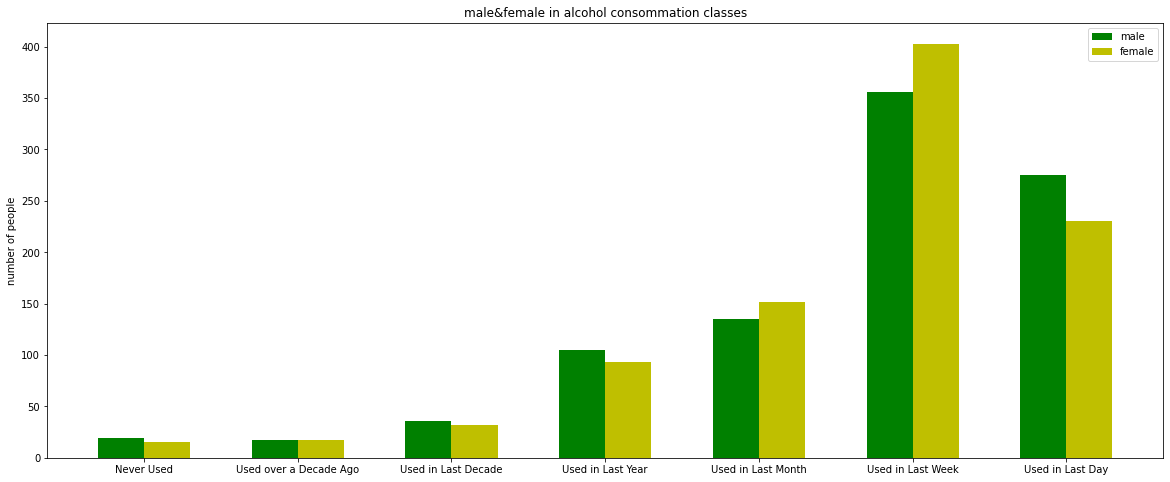

In [15]:
plt.figure(figsize=(20,8))
bar_width = 0.3
index_male = np.arange(7)
index_female = index_male + bar_width

plt.bar(index_male, height=piv_gender['male'], width=bar_width, color='g', label='male')
plt.bar(index_female, height=piv_gender['female'], width=bar_width, color='y', label='female')

plt.legend() 
plt.xticks(index_male + bar_width/2,piv_gender.index)
plt.ylabel('number of people')
plt.title('male&female in alcohol consommation classes') 
plt.show()

### education & alcohol using line plot

In [16]:
df_edu=df[['alcohol','education']]
df_edu
piv_edu=df_edu.pivot_table(index=['alcohol'],columns=['education'],aggfunc=len)
piv_edu.rename(index={'CL0':'Never Used','CL1':'Used over a Decade Ago','CL2':'Used in Last Decade',
                  'CL3':'Used in Last Year','CL4':'Used in Last Month','CL5':'Used in Last Week','CL6':'Used in Last Day'},
           columns={-2.43591:'Left school before 16',-1.73790:'Left school at 16',-1.43719:'Left school at 17',
                    -1.22751:'Left school at 18',-0.61113:'college or uni no degree',
                    -0.05921:'Pro certificate',0.45468:'University degree',1.16365:'Masters degree',1.98437:'Doctorate degree'}, inplace=True)
piv_edu

education,Left school before 16,Left school at 16,Left school at 17,Left school at 18,college or uni no degree,Pro certificate,University degree,Masters degree,Doctorate degree
alcohol,,,,,,,,,
Never Used,NaN,1.0,NaN,3.0,11.0,2.0,9.0,5.0,3.0
Used over a Decade Ago,3.0,4.0,NaN,1.0,2.0,10.0,9.0,5.0,NaN
Used in Last Decade,2.0,5.0,NaN,4.0,21.0,14.0,16.0,5.0,1.0
Used in Last Year,6.0,17.0,6.0,11.0,71.0,32.0,35.0,14.0,6.0
Used in Last Month,1.0,16.0,4.0,20.0,102.0,46.0,56.0,30.0,12.0
Used in Last Week,11.0,35.0,14.0,36.0,184.0,99.0,217.0,127.0,36.0
Used in Last Day,5.0,21.0,6.0,25.0,115.0,67.0,138.0,97.0,31.0


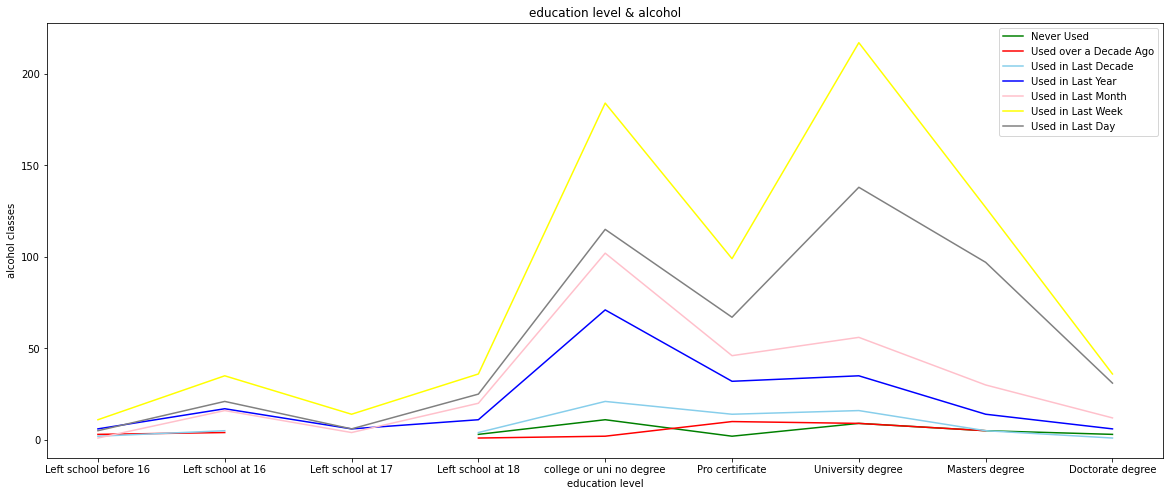

In [17]:
plt.figure(figsize=(20,8))
plt.title('education level & alcohol')
x_axix=piv_edu.columns
plt.plot(x_axix, piv_edu.iloc[0], color='green', label='Never Used')
plt.plot(x_axix, piv_edu.iloc[1], color='red', label='Used over a Decade Ago')
plt.plot(x_axix, piv_edu.iloc[2],  color='skyblue', label='Used in Last Decade')
plt.plot(x_axix, piv_edu.iloc[3], color='blue', label='Used in Last Year')
plt.plot(x_axix, piv_edu.iloc[4], color='pink', label='Used in Last Month')
plt.plot(x_axix, piv_edu.iloc[5], color='yellow', label='Used in Last Week')
plt.plot(x_axix, piv_edu.iloc[6], color='gray', label='Used in Last Day')
plt.legend()

plt.xlabel('education level')
plt.ylabel('alcohol classes')
plt.show()

### country & alcohol using UK as example, using pie chart

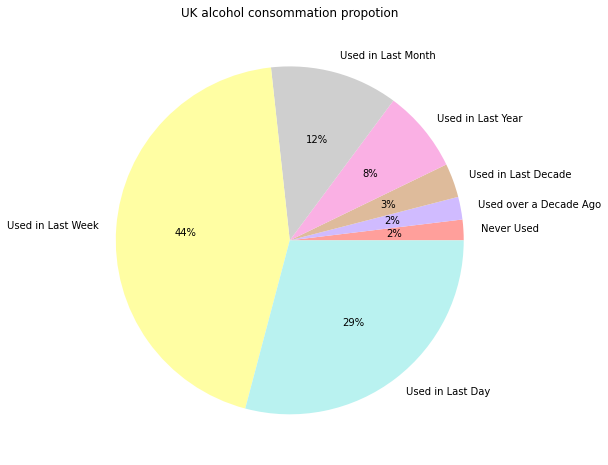

In [19]:
df_uk=df[df['country']==0.96082].groupby(['alcohol']).size().reset_index(name='counts')
labels=['Never Used','Used over a Decade Ago','Used in Last Decade','Used in Last Year','Used in Last Month','Used in Last Week','Used in Last Day']
data=df_uk['counts']
plt.figure(figsize=(20,8))
colors = sns.color_palette('pastel')[3:10]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('UK alcohol consommation propotion')
plt.show()

### ethnicity & alcohol using white people as example, using pie chart

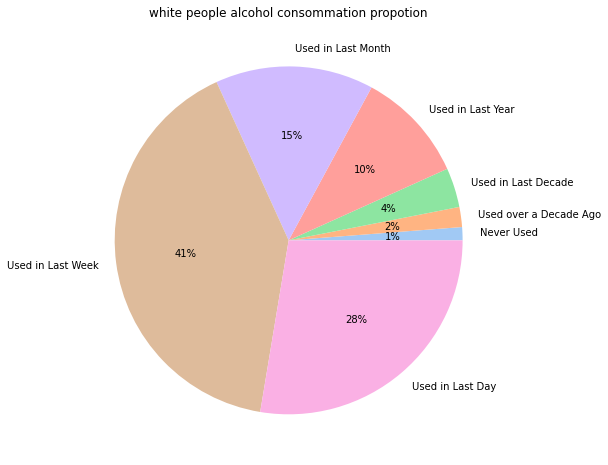

In [20]:
df_wh=df[df['ethnicity']==-0.31685].groupby(['alcohol']).size().reset_index(name='counts')
labels=['Never Used','Used over a Decade Ago','Used in Last Decade','Used in Last Year','Used in Last Month','Used in Last Week','Used in Last Day']
data=df_wh['counts']
plt.figure(figsize=(20,8))
colors = sns.color_palette('pastel')[0:7]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('white people alcohol consommation propotion')
plt.show()

### Nscore, Escore, Oscore, Ascore, Cscore using scatter plot

In [22]:
df_score=df[['nscore','escore','oscore','ascore','cscore','alcohol']]
df_nscore=df_score.groupby(['alcohol','nscore'])['nscore'].size().reset_index(name='nscore_counts')
df_nscore

,alcohol,nscore,nscore_counts
0,CL0,-1.86962,2
1,CL0,-1.43907,1
2,CL0,-1.32828,2
3,CL0,-1.05308,1
4,CL0,-0.92104,2
...,...,...,...
241,CL6,2.12700,2
242,CL6,2.28554,3
243,CL6,2.61139,2
244,CL6,2.82196,1


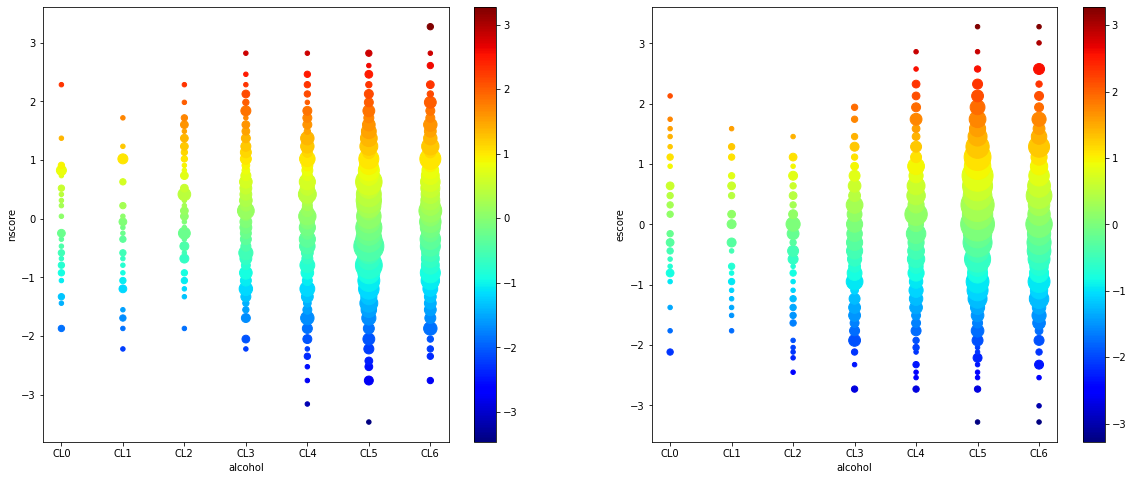

In [23]:
df_escore=df_score.groupby(['alcohol','escore'])['escore'].size().reset_index(name='escore_counts')
fig, axs = plt.subplots(1, 2,figsize=(20,8))
df_nscore.plot.scatter('alcohol','nscore',c=df_nscore['nscore'],colormap='jet',s=20*df_nscore['nscore_counts'],ax=axs[0]);
df_escore.plot.scatter('alcohol','escore',c=df_escore['escore'],colormap='jet',s=20*df_escore['escore_counts'],ax=axs[1]);

### Nscore, Escore, Oscore, Ascore, Cscore using box plot

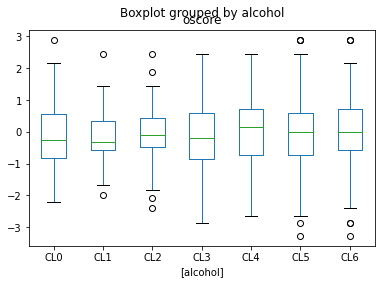

In [24]:
df_oscore=df[['oscore','alcohol']]
df_oscore.boxplot(by='alcohol',grid=False);

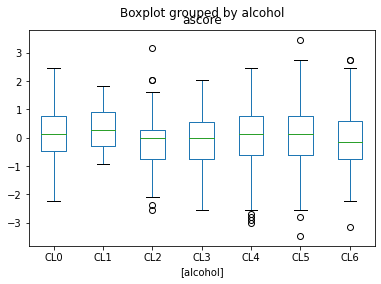

In [25]:
df_ascore=df[['ascore','alcohol']]
df_ascore.boxplot(by='alcohol',grid=False);

In [56]:
data2.head()

,ID,Age,Gender,Education,Country,Ethnicity,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Eduction
0,2,25-34,Male,Doctorate degree,UK,Other,6,2,2,0,7,4,7,3,0,4,0,2,0,2,3,0,4,0,0,8
1,3,35-44,Male,Professional certificate/ diploma,UK,Other,7,0,0,0,7,3,4,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4,18-24,Female,Masters degree,UK,Other,4,0,0,3,6,2,4,2,0,0,0,2,0,0,0,0,2,0,0,7
3,5,35-44,Female,Doctorate degree,UK,Other,4,1,1,0,7,3,7,0,0,1,0,0,1,0,0,2,2,0,0,8
4,6,65+,Female,Left school at 18 years,Canada,Other,2,0,0,0,7,0,4,0,0,0,0,0,0,0,0,0,7,0,0,2


In [57]:
drug_data = data2[drugs]

In [58]:
drug_data.describe()

,Alcohol,Amyl,Amphet,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.00000,1884.000000,1884.000000
mean,5.305202,0.616242,1.426752,1.559979,6.363057,3.334926,5.897028,1.193737,0.303609,1.359342,0.389597,0.589172,1.426221,1.098726,0.891189,1.211253,3.60828,0.009554,0.444798
std,1.737944,1.106526,2.000915,2.085051,1.402840,2.707522,1.428788,1.607914,0.873987,1.763157,1.114772,1.298723,1.961221,1.600524,1.840232,1.534853,2.86081,0.159373,1.023167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,7.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,0.000000,0.000000
75%,7.000000,1.000000,2.000000,3.000000,7.000000,6.000000,7.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,7.00000,0.000000,0.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,4.000000,7.000000


In [59]:
# the number of observation and frequency for every consumption level of every drug
counts = []
proportions = []
for drug in drugs:
    counts.append(drug_data[drug].value_counts())
    proportions.append(drug_data[drug].value_counts(normalize=True))

drug_table_count = pd.concat(counts, axis=1, 
          keys=drugs, sort=True)
drug_table_prop = (pd.concat(proportions, axis=1, 
          keys=drugs, sort=True) * 100).round(2)
drug_table = pd.concat([drug_table_count.T, drug_table_prop.T], keys=['N', '%'], axis=1)

drug_table

N                                                 %         \
                0      1      2      3      4      6       7      0      1   
Alcohol      34.0   34.0   68.0  198.0  287.0  758.0   505.0   1.80   1.80   
Amyl       1304.0  210.0  237.0   92.0   24.0   14.0     3.0  69.21  11.15   
Amphet      976.0  230.0  242.0  198.0   75.0   61.0   102.0  51.80  12.21   
Benzos     1000.0  116.0  233.0  236.0  120.0   84.0    95.0  53.08   6.16   
Caff         27.0   10.0   24.0   60.0  106.0  273.0  1384.0   1.43   0.53   
Cannabis    412.0  207.0  266.0  211.0  140.0  185.0   463.0  21.87  10.99   
Choc         32.0    3.0   10.0   54.0  296.0  682.0   807.0   1.70   0.16   
Coke       1037.0  160.0  270.0  258.0   99.0   41.0    19.0  55.04   8.49   
Crack      1626.0   67.0  112.0   59.0    9.0    9.0     2.0  86.31   3.56   
Ecstasy    1020.0  113.0  234.0  277.0  156.0   63.0    21.0  54.14   6.00   
Heroin     1604.0   68.0   94.0   65.0   24.0   16.0    13.0  85.14   3.61   
Ketamine   1489.0   45.0  142.0  129.0   42.0   33.0     4.0  79.03   2.39   
Legalh     1093.0   29.0  198.0  323.0  110.0   64.0    67.0  58.01   1.54   
LSD        1068.0  259.0  177.0  214.0   97.0   56.0    13.0  56.69  13.75   
Meth       1428.0   39.0   97.0  149.0   50.0   48.0    73.0  75.80   2.07   
Mushrooms   981.0  209.0  260.0  275.0  115.0   40.0     4.0  52.07  11.09   
Nicotine    428.0  193.0  203.0  185.0  108.0  157.0   610.0  22.72  10.24   
Semer      1876.0    2.0    3.0    2.0    1.0    NaN     NaN  99.58   0.11   
VSA        1454.0  200.0  135.0   61.0   13.0   14.0     7.0  77.18  10.62   

                                              
               2      3      4      6      7  
Alcohol     3.61  10.51  15.23  40.23  26.80  
Amyl       12.58   4.88   1.27   0.74   0.16  
Amphet     12.85  10.51   3.98   3.24   5.41  
Benzos     12.37  12.53   6.37   4.46   5.04  
Caff        1.27   3.18   5.63  14.49  73.46  
Cannabis   14.12  11.20   7.43   9.82  24.58  
Choc        0.53   2.87  15.71  36.20  42.83  
Coke       14.33  13.69   5.25   2.18   1.01  
Crack       5.94   3.13   0.48   0.48   0.11  
Ecstasy    12.42  14.70   8.28   3.34   1.11  
Heroin      4.99   3.45   1.27   0.85   0.69  
Ketamine    7.54   6.85   2.23   1.75   0.21  
Legalh     10.51  17.14   5.84   3.40   3.56  
LSD         9.39  11.36   5.15   2.97   0.69  
Meth        5.15   7.91   2.65   2.55   3.87  
Mushrooms  13.80  14.60   6.10   2.12   0.21  
Nicotine   10.77   9.82   5.73   8.33  32.38  
Semer       0.16   0.11   0.05    NaN    NaN  
VSA         7.17   3.24   0.69   0.74   0.37

In [ ]:
#Alcohol, caffeine and chocolate are legal stimulants that are consumed reguarly by the vast majority of respondents.
#cannabis and nicotine are also quite high and pretty equal 
#the other drugs are the least popular

In [110]:
data3=data.copy()

In [111]:
data3.drop(['ID'],axis=1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,0,7,4,7,3,0,4,0,2,0,2,3,0,4,0,0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,0,7,3,4,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,6,2,4,2,0,0,0,2,0,0,0,0,2,0,0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,7,3,7,0,0,1,0,0,1,0,0,2,2,0,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,7,0,4,0,0,0,0,0,0,0,0,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,6,0,0,0,4,6,4,0,0,0,0,0,3,3,0,0,0,0,6
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,6,0,0,0,6,3,4,0,0,2,0,0,3,6,4,4,6,0,0
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,7,6,6,7,7,7,4,0,4,0,2,0,2,0,2,7,0,0
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,6,0,0,0,7,7,6,0,0,3,0,0,3,3,0,3,4,0,0


In [ ]:
#regarding the correlation matrix above, we delete the features with a low correlation
low_corr = ['Age', 'Gender', 'Education', 'Alcohol','Ascore','Caff']
for column in low_corr:
    data3 = data3.drop(column, axis=1)

In [114]:
#feature engeering
#meth
meth_data = data.copy()
meth_data['Meth_User'] = meth_data['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_data = meth_data.drop(['Meth'], axis=1)

In [115]:
#cocaine
coc_data = data3.copy()
coc_data['Cocaine_User'] = coc_data['Coke'].apply(lambda x: 1 if x not in [0,1] else 0)
coc_data = coc_data.drop(['Coke'], axis=1)

In [116]:
#crack
crack_data = data3.copy()
crack_data['Crack_User'] = crack_data['Crack'].apply(lambda x: 1 if x not in [0,1] else 0)
crack_data = crack_data.drop(['Crack'], axis=1)

In [117]:
#nicotine
nico_data = data3.copy()
nico_data['Nico_User'] = nico_data['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0)
nico_data = nico_data.drop(['Nicotine'], axis=1)

In [118]:
#heroin
hero_data = data3.copy()
hero_data['Hero_User'] = nico_data['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0)
hero_data = nico_data.drop(['Heroin'], axis=1)

In [105]:
coc_data.head(1)
coc_data.drop(['ID'],axis=1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Cocaine_User
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,0,7,4,7,0,4,0,2,0,2,3,0,4,0,0,1
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,0,7,3,4,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,6,2,4,0,0,0,2,0,0,0,0,2,0,0,1
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,7,3,7,0,1,0,0,1,0,0,2,2,0,0,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,7,0,4,0,0,0,0,0,0,0,0,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,6,0,0,0,4,6,4,0,0,0,0,3,3,0,0,0,0,6,0
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,6,0,0,0,6,3,4,0,2,0,0,3,6,4,4,6,0,0,0
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,7,6,6,7,7,7,0,4,0,2,0,2,0,2,7,0,0,1
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,6,0,0,0,7,7,6,0,3,0,0,3,3,0,3,4,0,0,0


In [ ]:
#modeling

In [155]:
def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [156]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

In [157]:
#cocaine
X_train, X_test, y_train, y_test = preprocessing_inputs(coc_data, 'Cocaine_User')

In [158]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

In [159]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [160]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))

                  ACCURACY
     Logisitc Regression Accuracy: 86.47%
        Ridge Classifier Accuracy: 84.88%
 Support Vector Machines Accuracy: 88.06%
Random Forest Classifier Accuracy: 87.53%


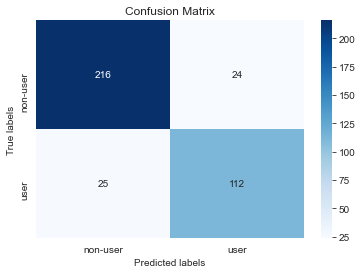

In [162]:
#confusion matrix of users and non users
model = RandomForestClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

In [163]:
#meth
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_data, 'Meth_User')

In [164]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

In [165]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [166]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))

                  ACCURACY
     Logisitc Regression Accuracy: 85.94%
        Ridge Classifier Accuracy: 85.68%
 Support Vector Machines Accuracy: 86.21%
Random Forest Classifier Accuracy: 87.27%


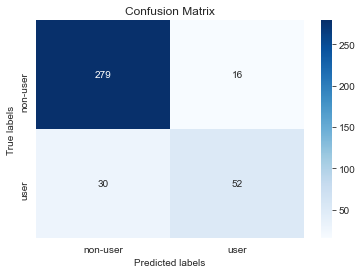

In [167]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

In [168]:
#crack
X_train, X_test, y_train, y_test = preprocessing_inputs(crack_data, 'Crack_User')

In [179]:
#modeling using gridsearchcv
#model knn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

# find best model score
gs_knn.score(X_train, y_train)

0.9150630391506304

In [192]:
from sklearn.model_selection import StratifiedKFold

In [207]:
#modeling using gridsearchcv
#model logistic regression
#define models and parameters

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=10,  random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\msi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best: 0.905108 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [205]:
# define models and parameters
#svm
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.906443 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
